<a href="https://colab.research.google.com/github/KaliBlip/autism/blob/main/Data_Visualization_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'videogamesales:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F284%2F618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250130%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250130T021146Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D77963efb32729e951a538f7e2ce131a1b848e9f19d33fe3b7c9af01e84117e9781ef8c7a266ff63728326d5c26351ad8130d02b798908b3815f83f5a74e0334cdf0102618a3e393f84a7d5207a243d9216baae9daa5dbd08ec971b1736afba613174a58c2ce095522165b87e11cda8160619b72ecaabe4529456ad919b947e50389c0b0342181aff252dc612fddd2cbd0c39c0b325fc50cfef2c4316cb6f272cc5dd902250c35cb778c706633c161dd24e46b2e7c97ebf0833c315cad719b3f78582b7a45ce8492e54a776e6a93b23cb02d8e18209f9cc7be509f6320ff3dc85abd5cee82015d0cbaf389ce46f3ace6d76ba9d07314bc2e90e3c866bd9001e97'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: videogamesales"
[1] "Downloaded and uncompressed: videogamesales"
[1] "Data source import complete"


#             Video Game Sales Visualizing with R

In [ ]:
install.packages('tidyverse', dependencies = TRUE)
install.packages('ggplot2', dependencies = TRUE)
install.packages('reshape2', dependencies = TRUE)

In [ ]:
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(reshape2)


In [11]:
games <- read.csv("/content/vgsales.csv", stringsAsFactors = FALSE)

In [12]:
head(games)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [13]:
str(games)

'data.frame':	16598 obs. of  11 variables:
 $ Rank        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name        : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year        : chr  "2006" "1985" "2008" "2009" ...
 $ Genre       : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num  41.5 29.1 15.8 15.8 11.3 ...
 $ EU_Sales    : num  29.02 3.58 12.88 11.01 8.89 ...
 $ JP_Sales    : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales : num  8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ Global_Sales: num  82.7 40.2 35.8 33 31.4 ...


In [14]:
summary(games)

      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

In [15]:
unique(games$Year)

[1] "2006" "1985" "2008" "2009" "1996" "1989" "1984" "2005" "1999" "2007"
[11] "2010" "2013" "2004" "1990" "1988" "2002" "2001" "2011" "1998" "2015"
[21] "2012" "2014" "1992" "1997" "1993" "1994" "1982" "2003" "1986" "2000"
[31] "N/A"  "1995" "2016" "1991" "1981" "1987" "1980" "1983" "2020" "2017"

In [16]:
games <- games[games$Year!='N/A',]
games$Year <- factor(games$Year)

In [17]:
games <- games[,2:11]

In [18]:
head(games)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


# Sum of Global Sales by Year

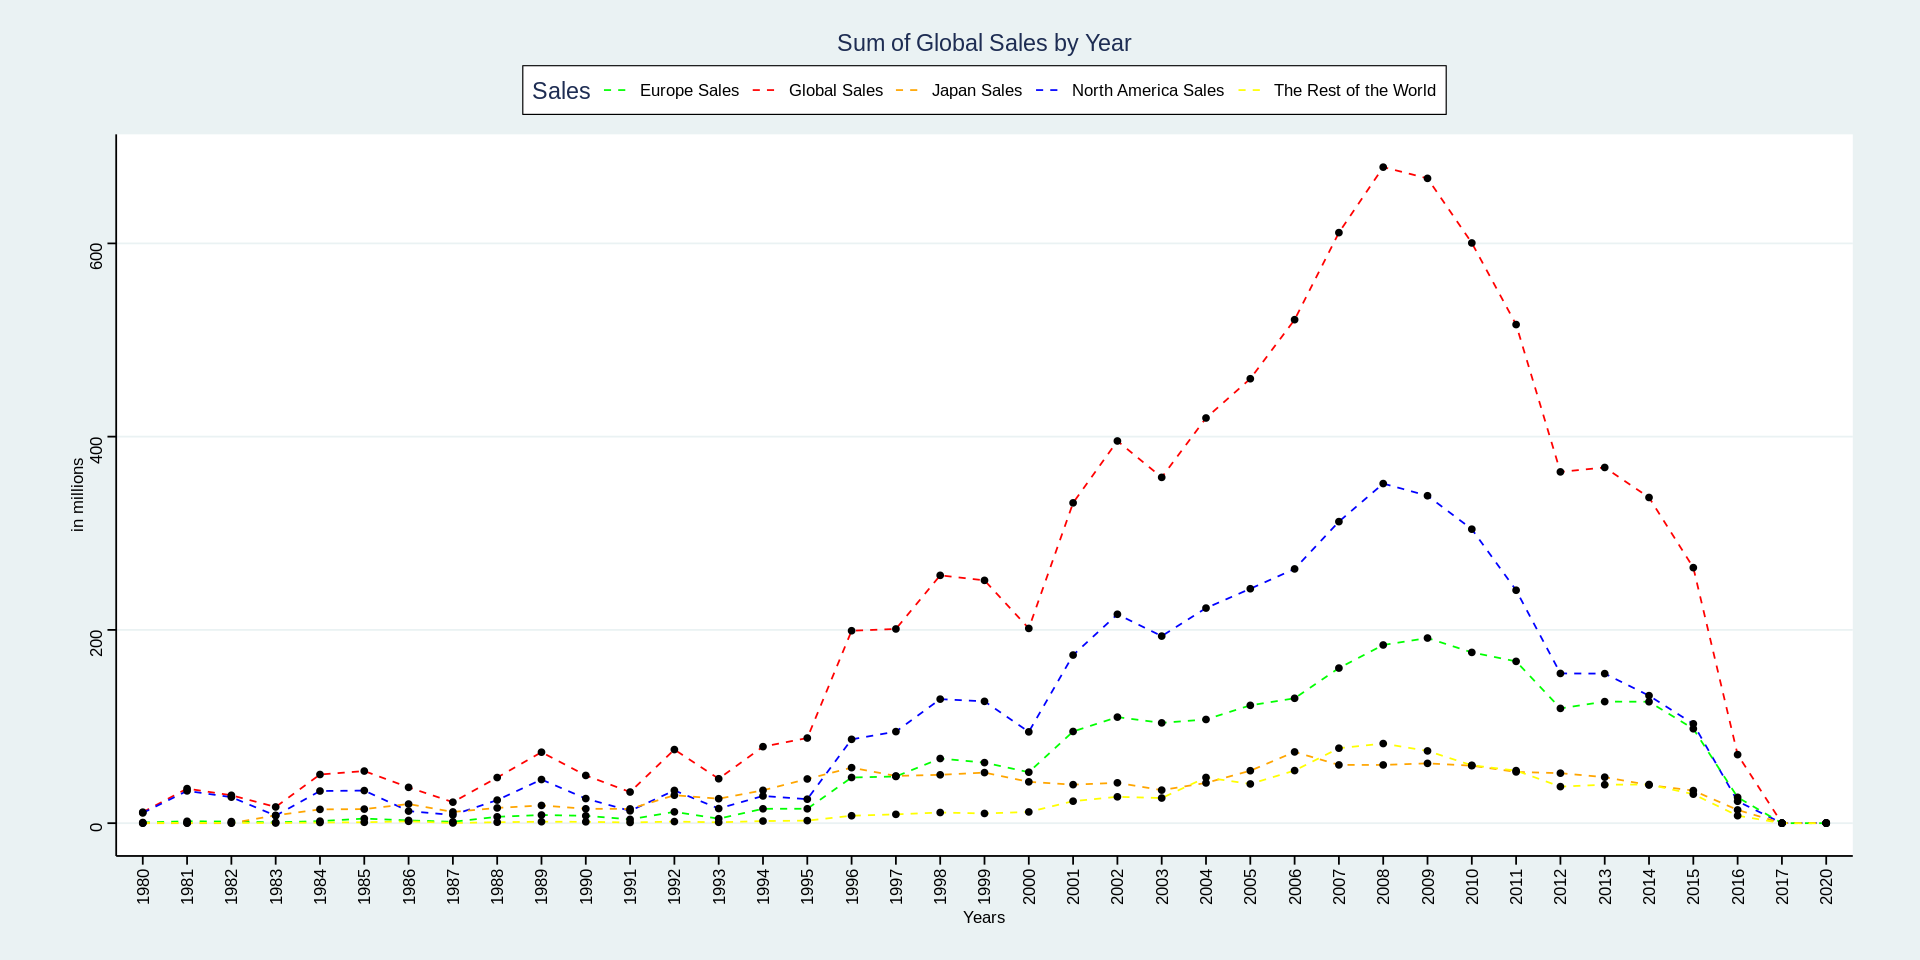

In [19]:
sumofsales <- games %>%
    group_by(Year) %>%
    summarise(sum_global_sales = sum(Global_Sales),sum_others_sales = sum(Other_Sales),
              sum_jb_sales = sum(JP_Sales),sum_eu_sales = sum(EU_Sales),
              sum_na_sales = sum(NA_Sales),.groups = 'drop')

colors <- c("Global Sales"="red", "North America Sales"="blue", "Europe Sales"="green", "Japan Sales"="orange",
            "The Rest of the World"="yellow")
options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data=sumofsales, aes(x= Year)) +
  geom_line(aes(y= sum_global_sales,group=1,color="Global Sales"),linetype = "dashed")+
  geom_line(aes(y= sum_na_sales,group=1,color="North America Sales"),linetype = "dashed")+
  geom_line(aes(y= sum_eu_sales,group=1,color="Europe Sales"),linetype = "dashed")+
  geom_line(aes(y= sum_jb_sales,group=1,color="Japan Sales"),linetype = "dashed")+
  geom_line(aes(y= sum_others_sales,group=1,color="The Rest of the World"),linetype = "dashed")+
  geom_point(aes(y= sum_global_sales)) +
  geom_point(aes(y= sum_na_sales)) +
  geom_point(aes(y= sum_eu_sales)) +
  geom_point(aes(y= sum_jb_sales)) +
  geom_point(aes(y= sum_others_sales)) +
  scale_color_manual(name="Sales",values = colors)+
  ggtitle("Sum of Global Sales by Year") +
  xlab("Years") +
  ylab("in millions") +
  theme_stata()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),legend.position="top")

**Sum of Global Sales by Year**

This line plot shows how the global video game sales have evolved over time, segmented by regions: **North America, Europe, Japan, and the Rest of the World.** Each region's sales are represented by a different dashed line, allowing a clear comparison of how each region has contributed to the global sales trend over the years.

In [20]:
year_count<- games %>%
                group_by(Year) %>%
                summarise(count_year = n())
tail(year_count)

Year,count_year
<fct>,<int>
2013,546
2014,582
2015,614
2016,344
2017,3
2020,1


In [21]:
games <- games[games$Year!='2017'& games$Year!='2020',]
head(games)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<chr>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


# Top-10 Games by Sales

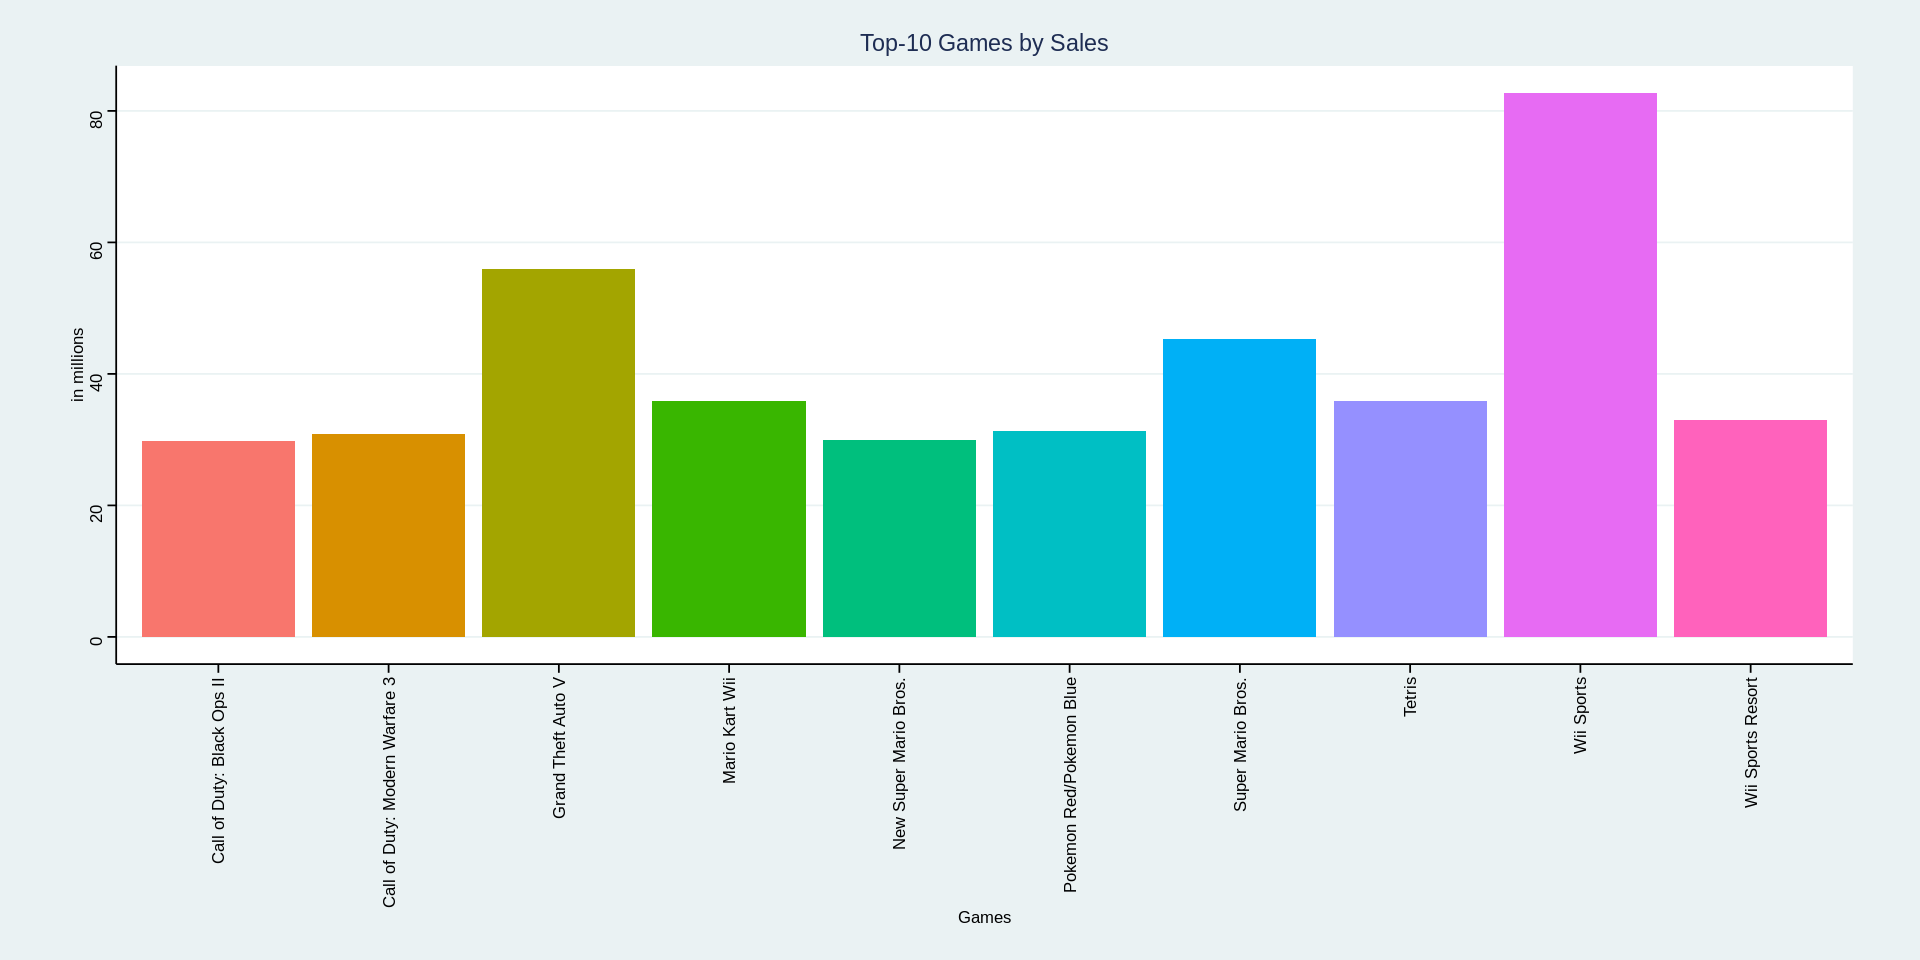

In [22]:
games_sales10 <-games %>%
    group_by(Name) %>%
    summarise(sum_global_sales = sum(Global_Sales),.groups = 'drop') %>%
    arrange(desc(sum_global_sales))
games_totalsales <- head(games_sales10,10)

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data= games_totalsales, aes(x= Name, y=sum_global_sales)) +
  geom_bar(stat = "identity",  aes(x= Name, y=sum_global_sales,fill=Name))+
  ggtitle("Top-10 Games by Sales") +
  xlab("Games") +
  ylab("in millions") +
  theme_stata()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
       legend.position="none")

**Top-10 Games by Sales**

A bar chart displays the top 10 video games based on global sales. The games are sorted by their total sales, and each bar represents a game’s global sales, giving a quick view of the best-selling games in the dataset.

# Genre by % Global Sales

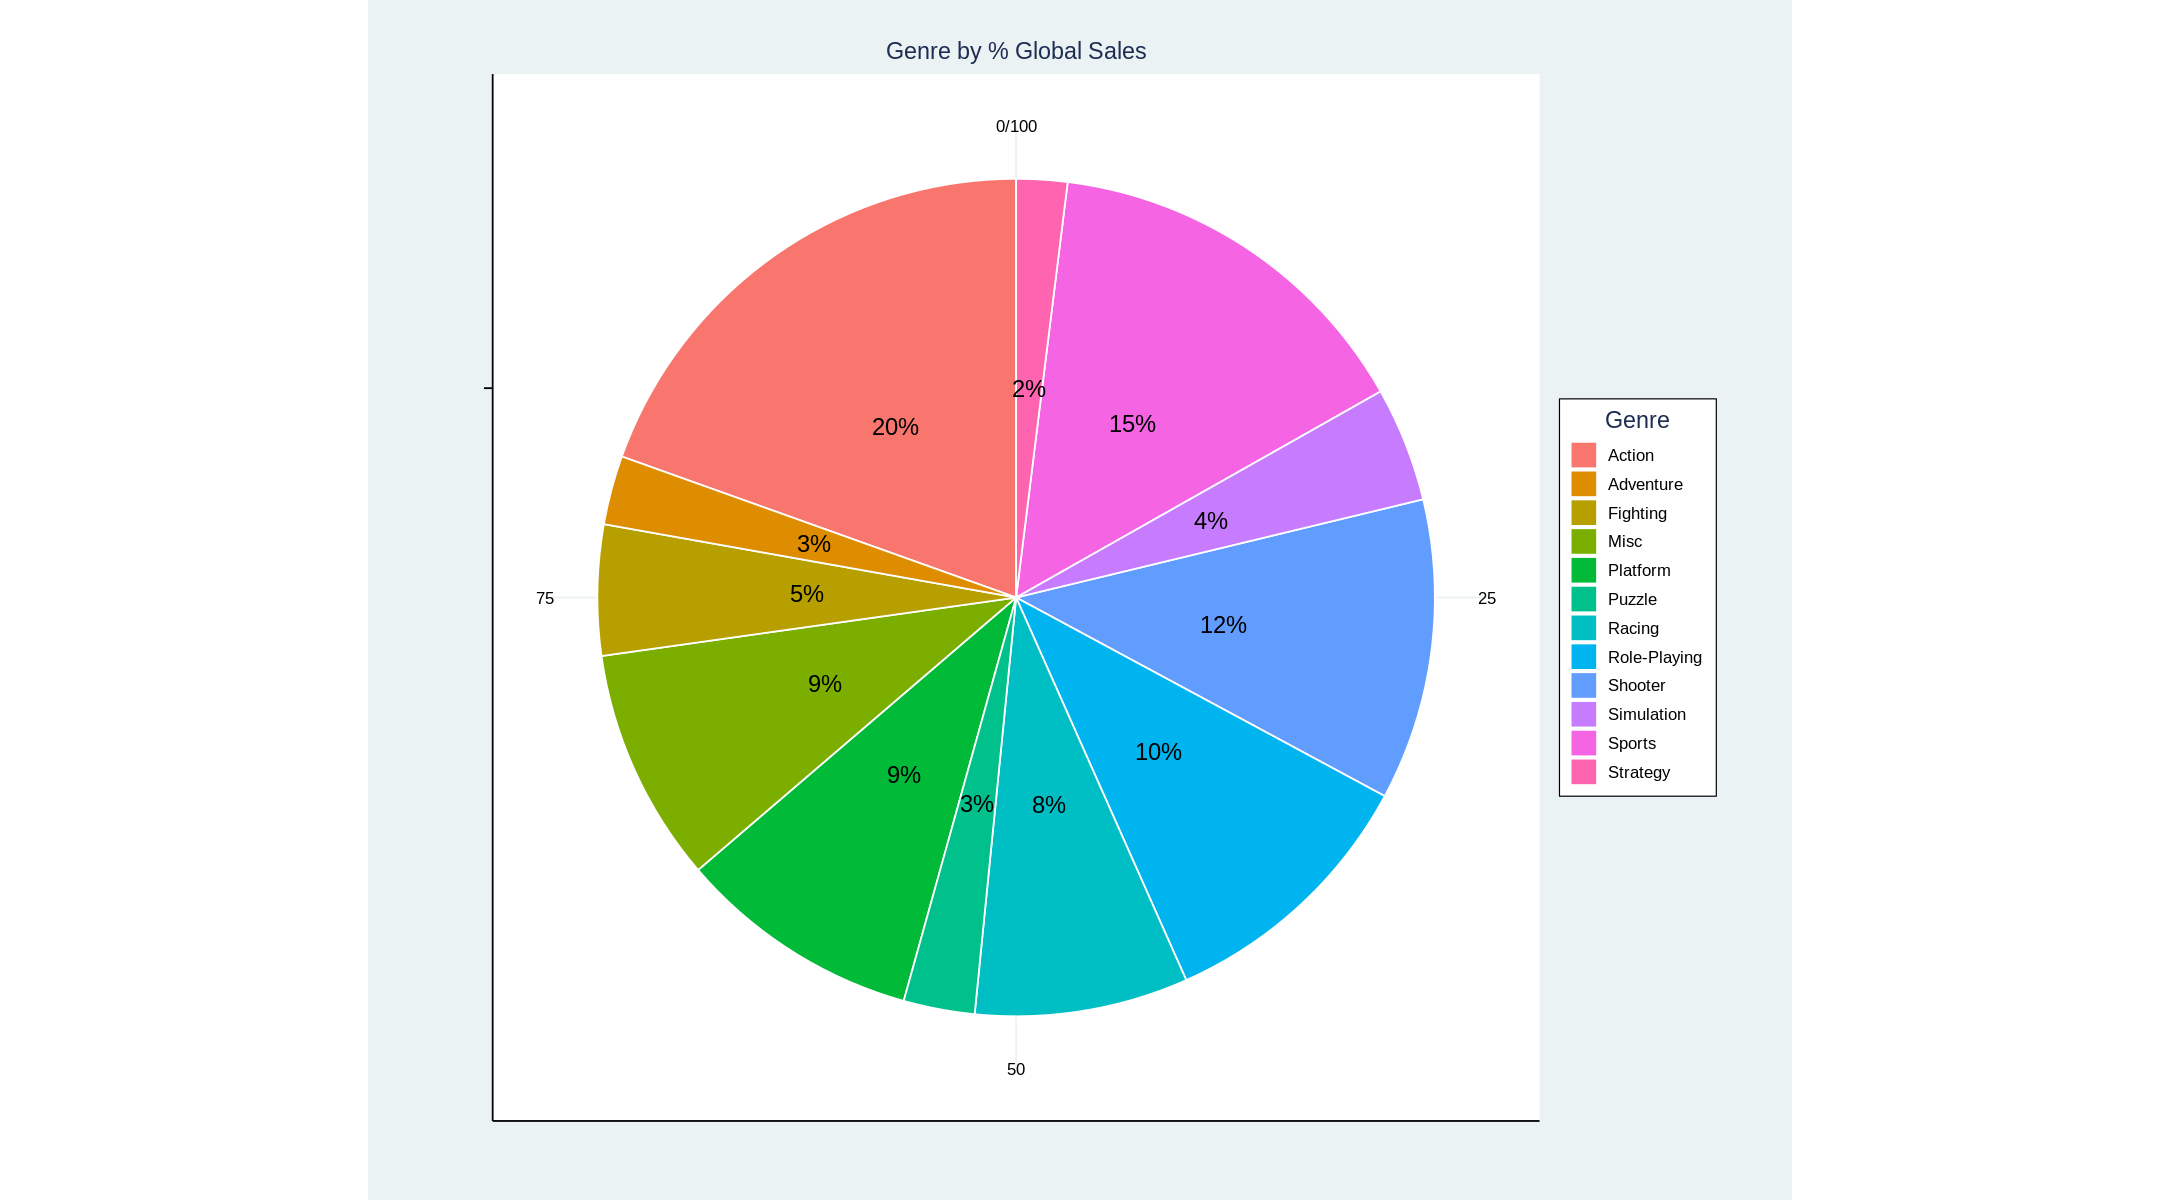

In [23]:
genre_sales <-games %>%
    group_by(Genre) %>%
    summarise(sum_global_sales = sum(Global_Sales),.groups = 'drop') %>%
    arrange(desc(sum_global_sales))%>%
    mutate(percent = sum_global_sales/sum(sum_global_sales)*100)

options(repr.plot.width = 18, repr.plot.height = 10)
ggplot(data= genre_sales, aes(x= "",y=percent,fill = Genre))+
  geom_bar(stat="identity", width=1, color="white")+
  coord_polar("y", start=0)+
  ggtitle("Genre by % Global Sales") +
  xlab("") +
  ylab("") +
  theme_stata()+
  theme(legend.position="right")+
  geom_text(aes(label = paste0(round(percent),"%")), position = position_stack(vjust = 0.5),color = "black",size=5)

**Top-20 Publishers by Sales**

A horizontal bar chart displays the top 20 video game publishers based on global sales. This visualization allows users to quickly identify the leading companies in the video game publishing industry and their relative sales.

# Top-20 Publisher by Sales

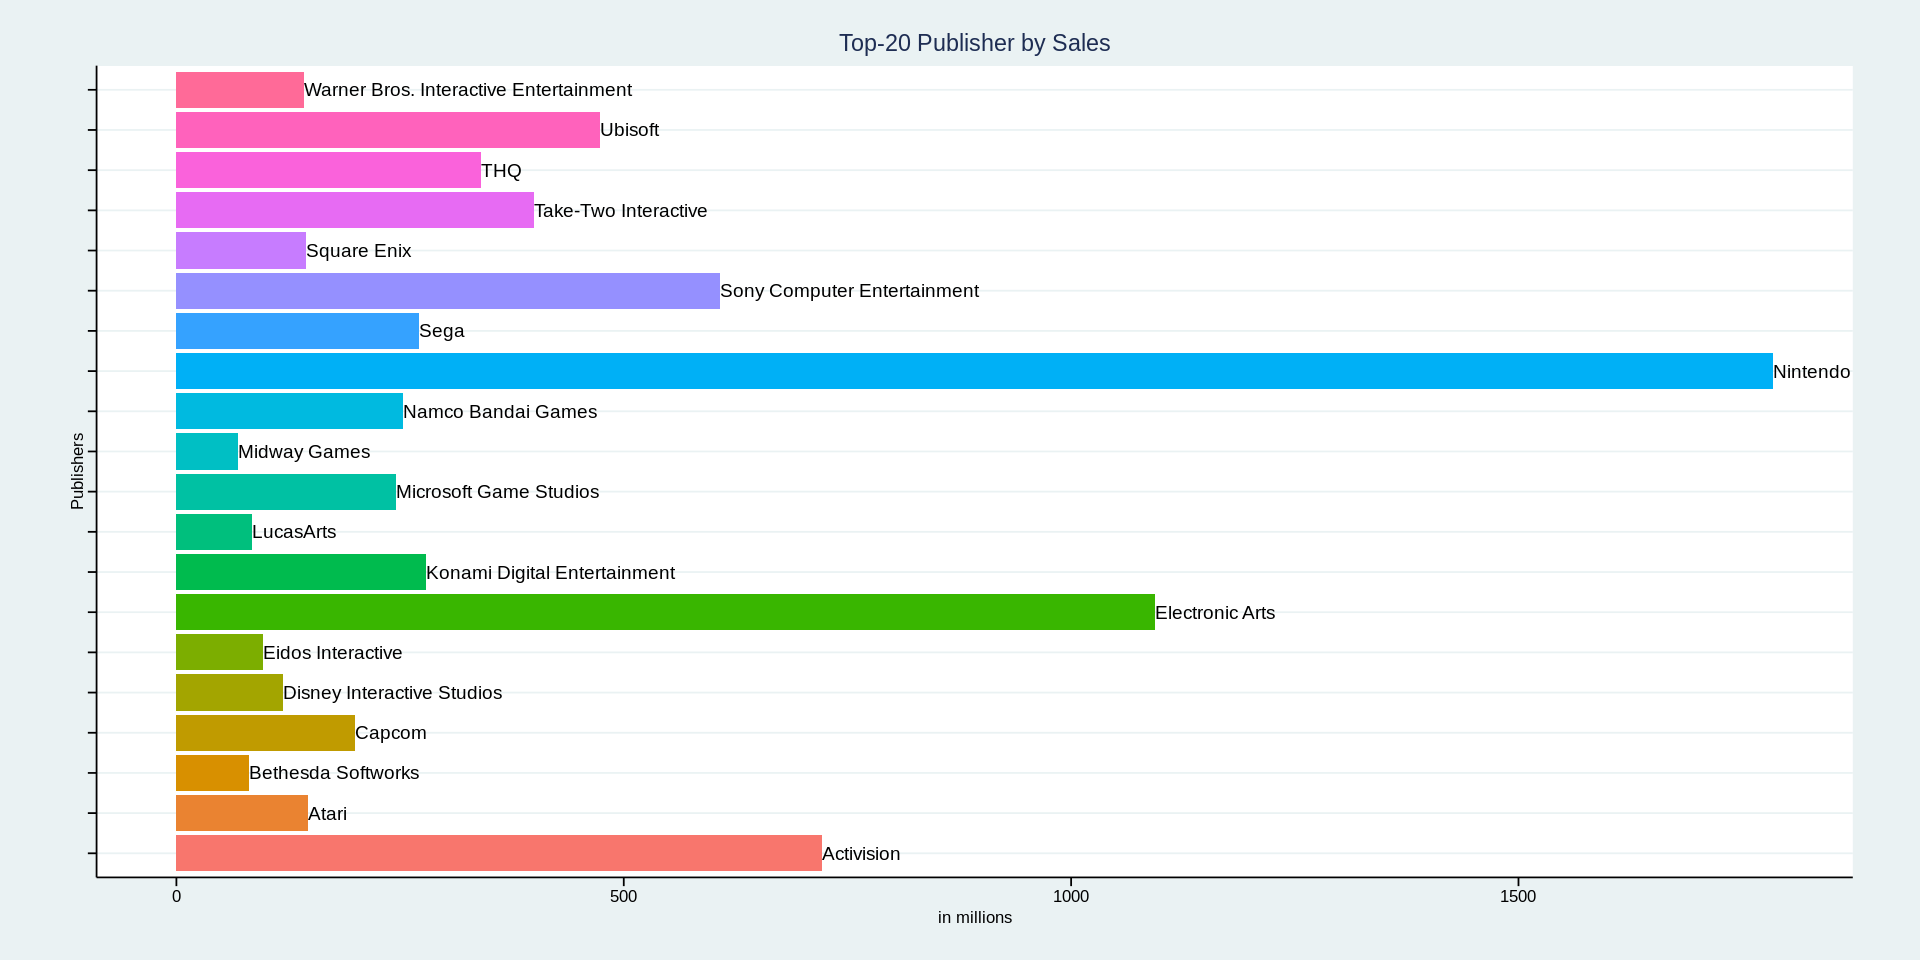

In [24]:
publisher_sales <-games %>%
    group_by(Publisher) %>%
    summarise(sum_global_sales = sum(Global_Sales),.groups = 'drop') %>%
    arrange(desc(sum_global_sales))
publisher_sales20 <- head(publisher_sales,20)

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data= publisher_sales20, aes(x= Publisher, y=sum_global_sales)) +
  geom_bar(stat = "identity",  aes(x= Publisher, y=sum_global_sales,fill=Publisher))+
  coord_flip()+
  ggtitle("Top-20 Publisher by Sales") +
  xlab("Publishers") +
  ylab("in millions") +
  geom_text(aes(label=Publisher), vjust=0.5,hjust=0, color="black",
            position = position_dodge(1), size=4)+
  theme_stata()+
  theme(legend.position="none",axis.text.y=element_blank())

**Top-20 Publishers by Sales**

A horizontal bar chart displays the top 20 video game publishers based on global sales. This visualization allows users to quickly identify the leading companies in the video game publishing industry and their relative sales.

# Platforms Distribution by Yearly Number of Published Games

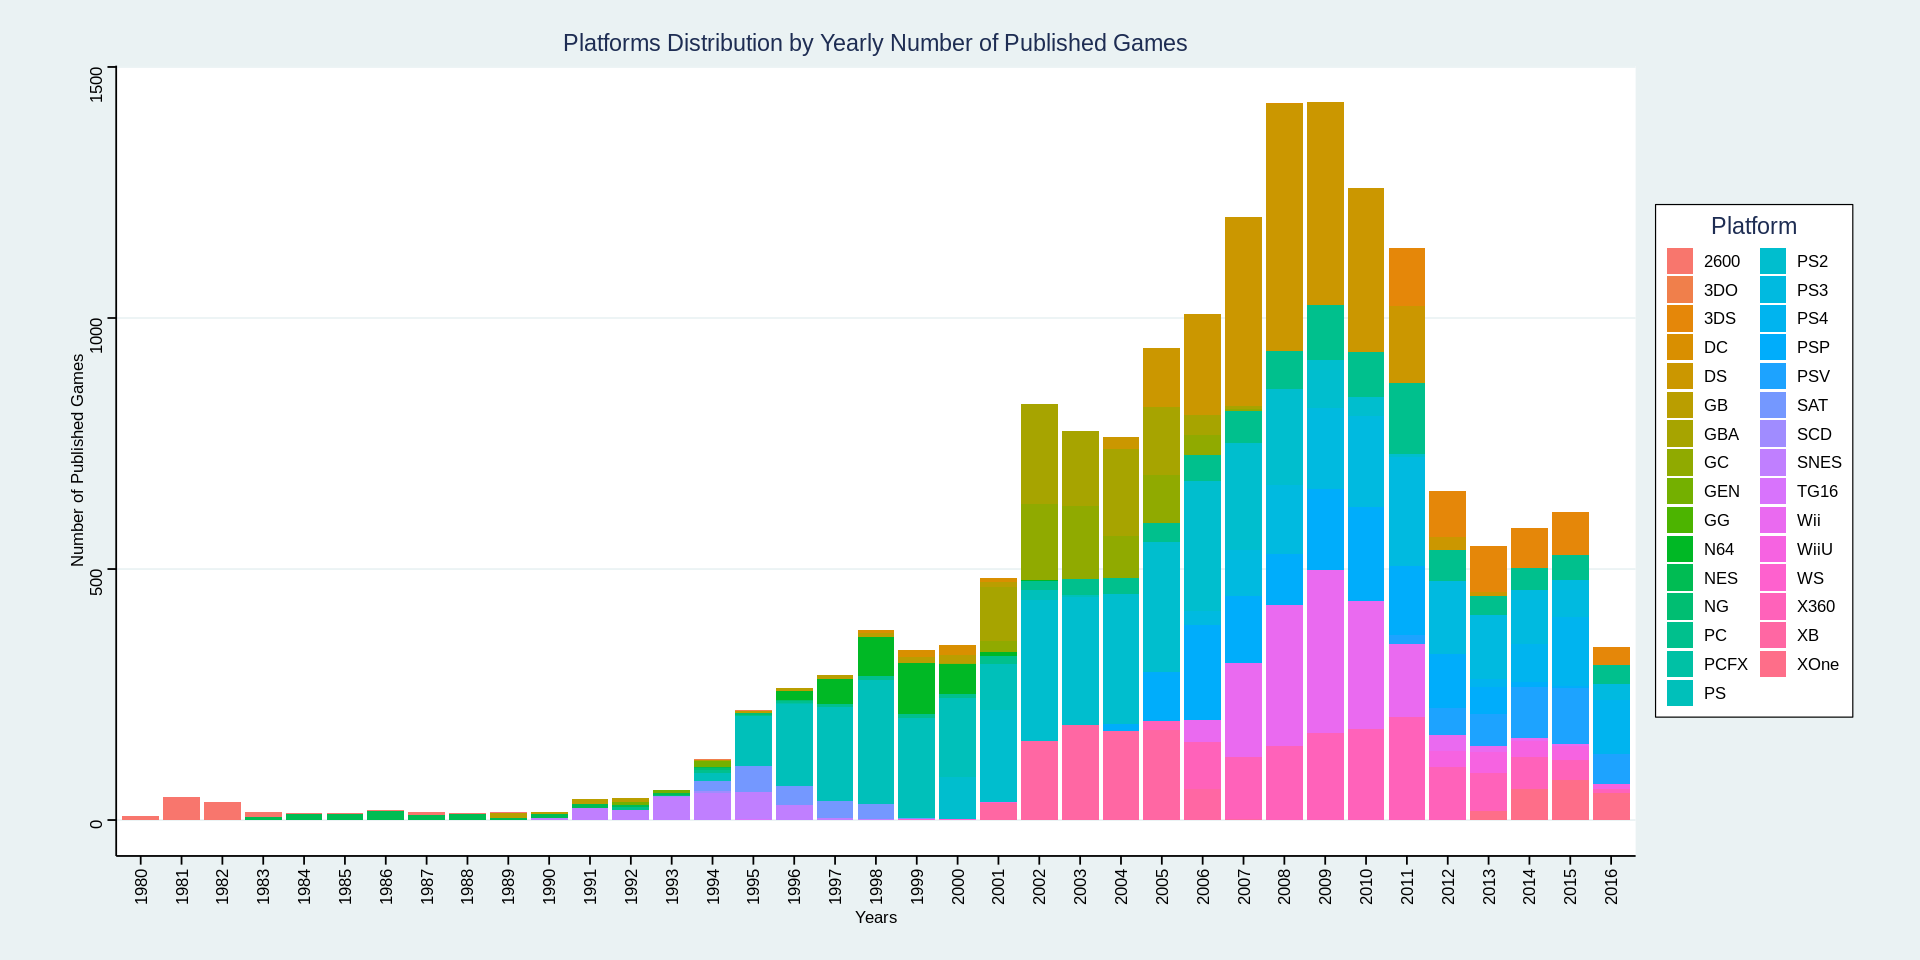

In [25]:
platform_game <-games %>%
    group_by(Year,Platform) %>%
    summarise(count_name = length(unique(Name)),.groups = 'drop') %>%
    arrange(desc(Year))

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(platform_game, aes(fill=Platform, y=count_name, x=Year)) +
    geom_bar(position="stack", stat="identity")+
      ggtitle("Platforms Distribution by Yearly Number of Published Games") +
      xlab("Years") +
      ylab("Number of Published Games") +
      theme_stata()+
      theme(legend.position="right",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

**Platforms Distribution by Yearly Number of Published Games**

This stacked bar chart shows how the number of published games on different platforms has evolved over the years. Each bar represents a year, and the segments in the bar represent the count of games published on various platforms, showing the trends in platform usage over time.

# Popularity of Platforms by Sales District

Using Platform as id variables



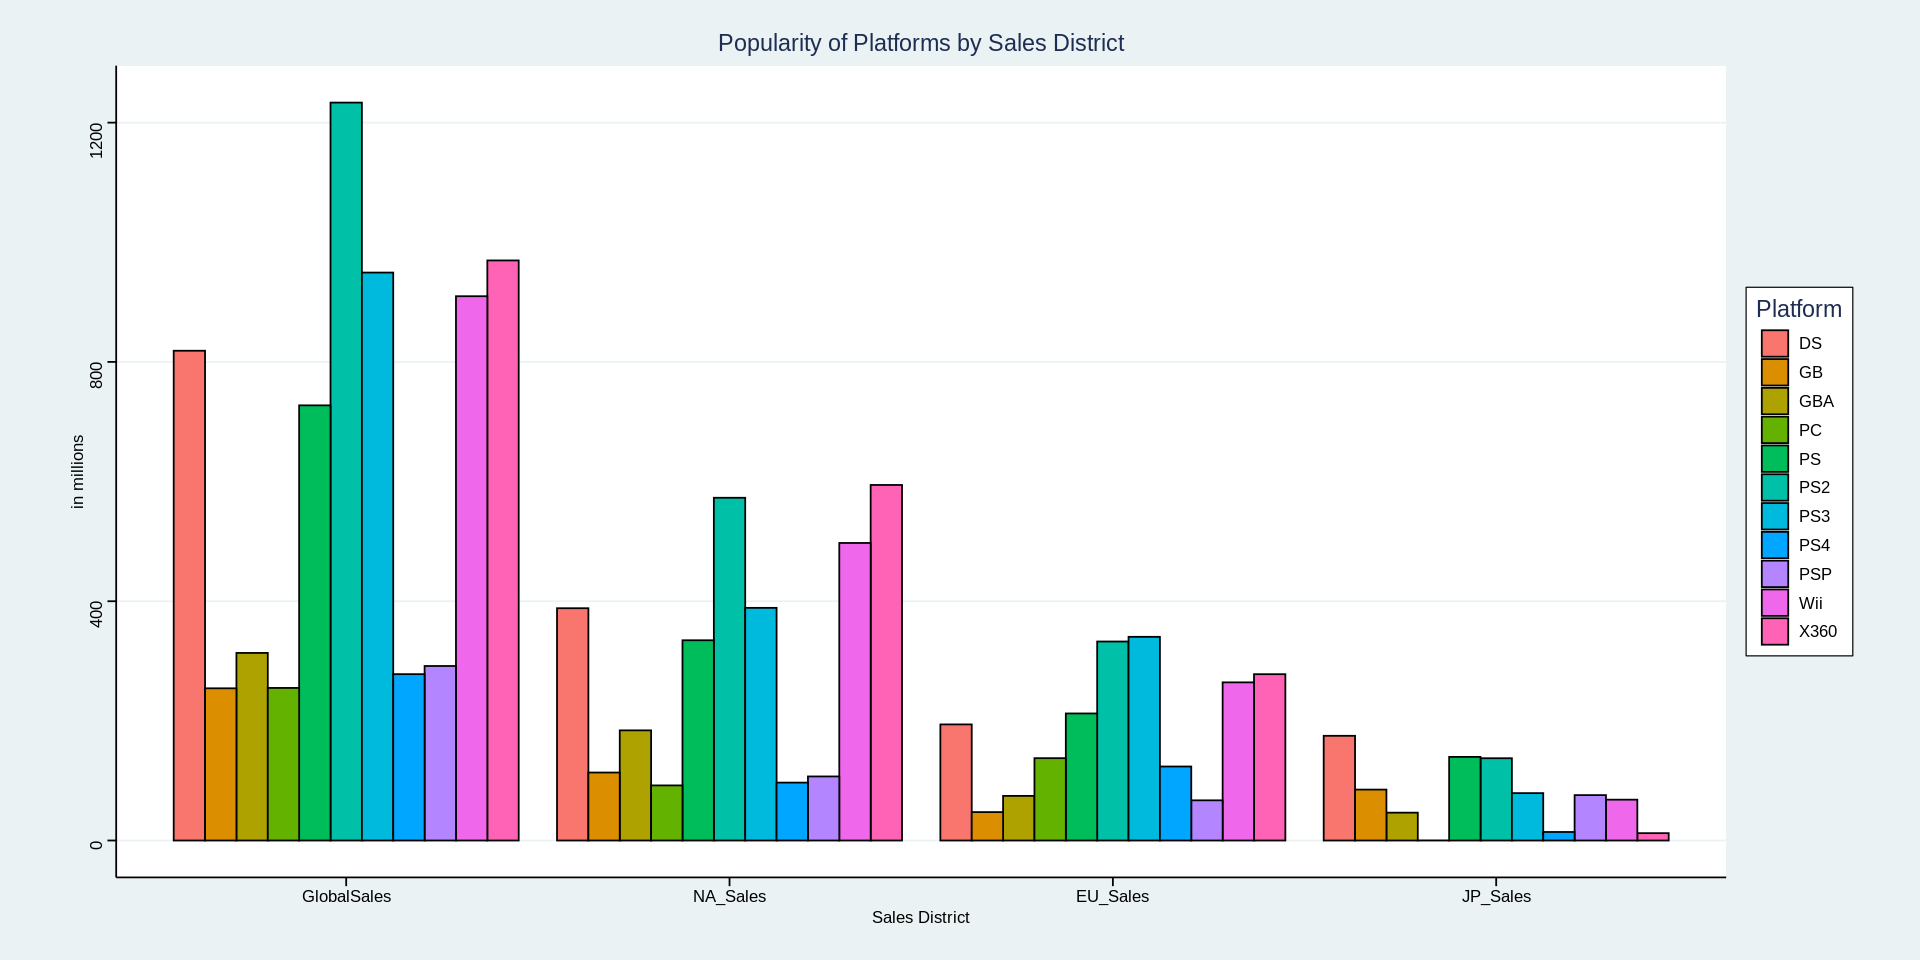

In [26]:
platform_sales <-games %>%
    group_by(Platform) %>%
    summarise(GlobalSales = sum(Global_Sales),
              NA_Sales = sum(NA_Sales),
              EU_Sales = sum(EU_Sales),
              JP_Sales = sum(JP_Sales),.groups = 'drop') %>%
    arrange(desc(GlobalSales))
platform_sales11 <- head(platform_sales,11)
platform_sales11 = melt(platform_sales11)
names(platform_sales11) = c('Platform','SaleDistrict','Sales')

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data=platform_sales11,aes(x = SaleDistrict,y = Sales, fill=Platform))+
      geom_bar(stat='identity', position='dodge',colour='black' )+
      ggtitle("Popularity of Platforms by Sales District") +
      xlab("Sales District") +
      ylab("in millions") +
      theme_stata()+
      theme(legend.position="right")

# Genre Distribution by Publishers

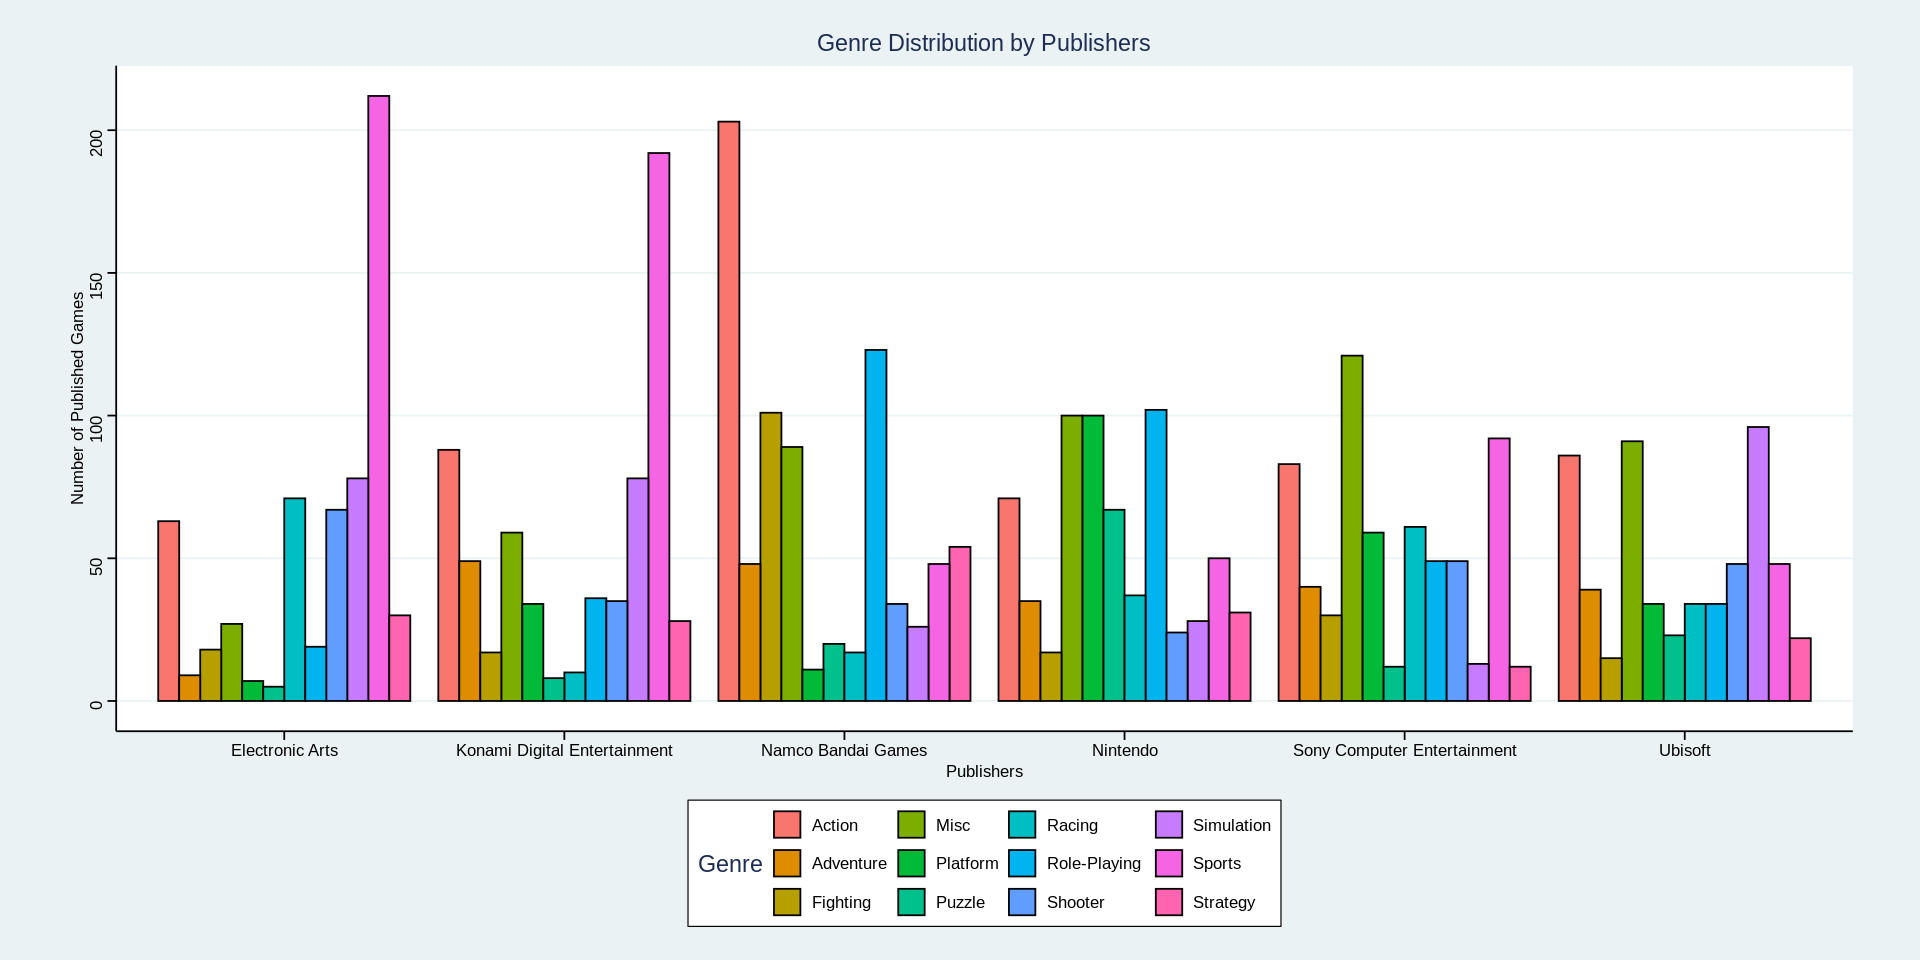

In [27]:
publisher_count <-games %>%
    group_by(Publisher) %>%
    summarise(count_name = length(unique(Name)),.groups = 'drop') %>%
    arrange(desc(count_name)) %>%
    select(Publisher)%>%
    head(6)
publisher_count6 <-as.vector(publisher_count$Publisher)

publisher_genre<- games %>%
    filter(Publisher %in% publisher_count6)%>%
    group_by(Publisher,Genre) %>%
    summarise(count_name = length(unique(Name)),.groups = 'drop') %>%
    arrange(desc(count_name))

options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data=publisher_genre,aes(x = Publisher,y = count_name, fill=Genre))+
      geom_bar(stat='identity', position='dodge',colour='black' )+
      ggtitle("Genre Distribution by Publishers") +
      xlab("Publishers") +
      ylab("Number of Published Games") +
      theme_stata()+
      theme(legend.position="bottom")

# Top-5 Publisher Distribution by Yearly Number of Game and Sales

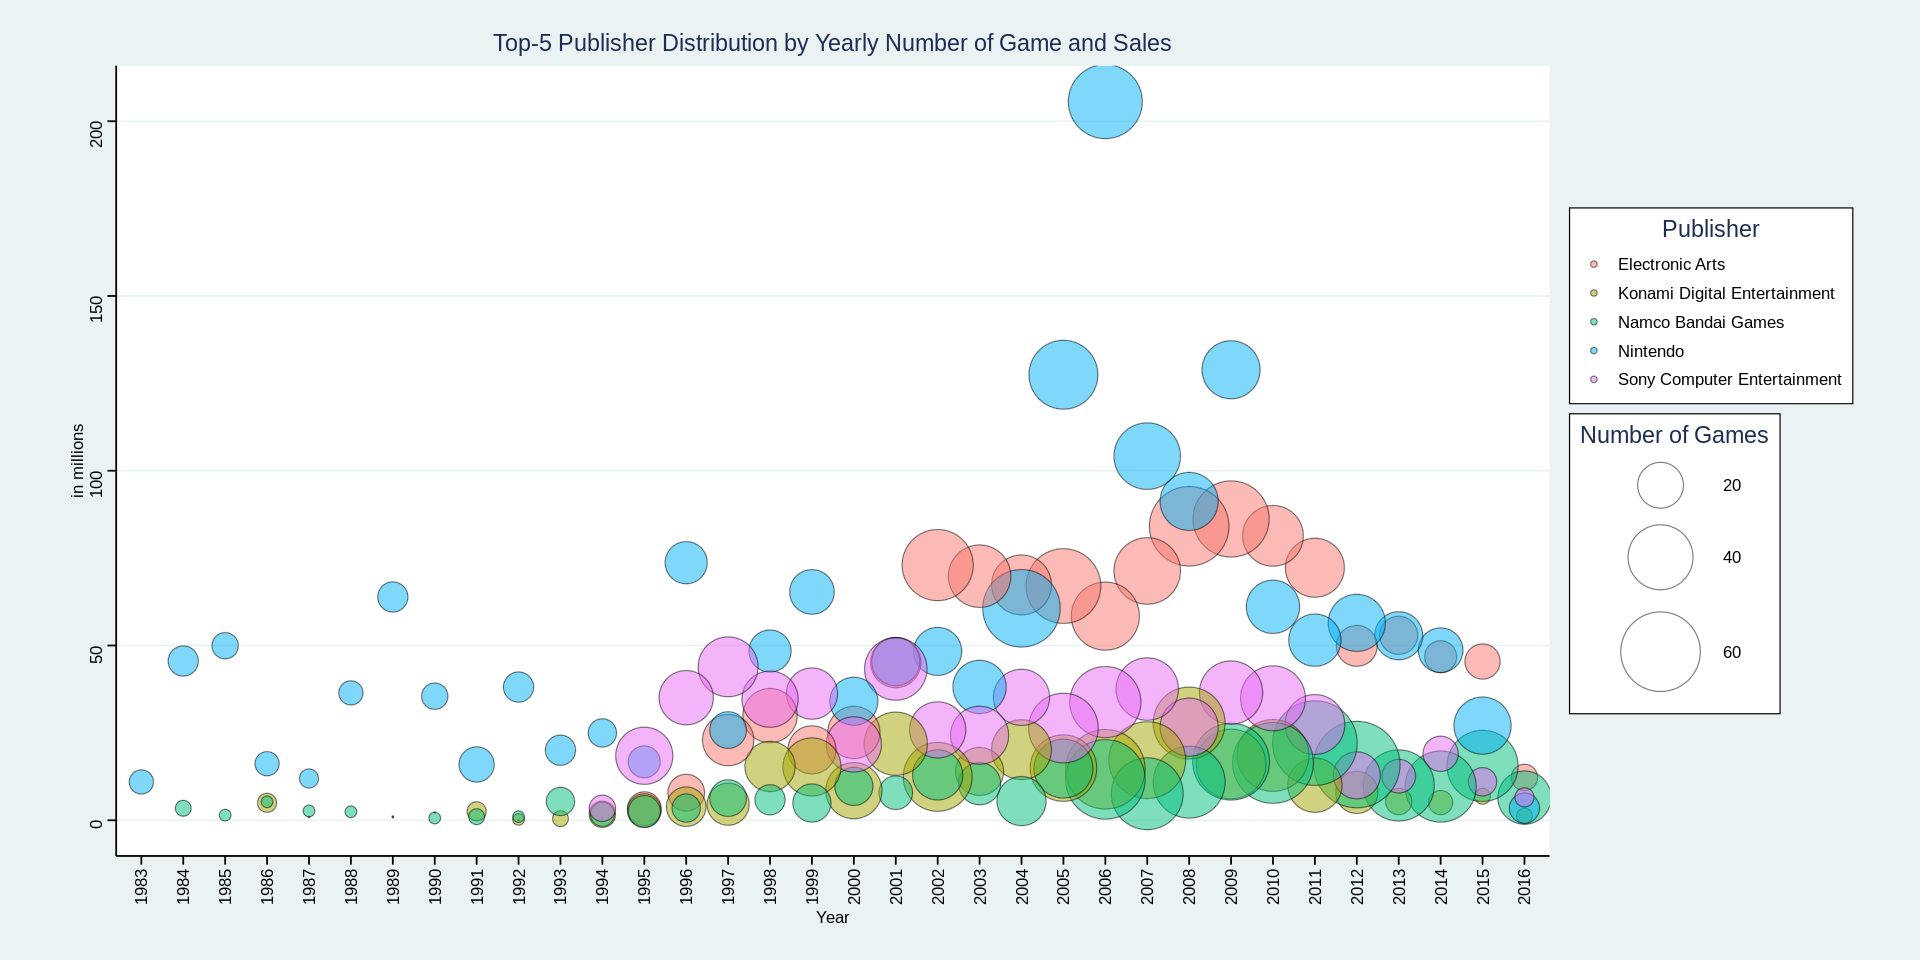

In [28]:
publisher_count <-games %>%
    group_by(Publisher) %>%
    summarise(GlobalSales = sum(Global_Sales),count_game = length(unique(Name)),.groups = 'drop') %>%
    arrange(desc(count_game)) %>%
    select(Publisher)%>%
    head(5)
publisher_count20 <-as.vector(publisher_count$Publisher)

publisher_bubble<- games %>%
    filter(Publisher %in% publisher_count20)%>%
    group_by(Year,Publisher) %>%
    summarise(GlobalSales = sum(Global_Sales),count_game = length(unique(Name)),.groups = 'drop') %>%
    arrange(desc(Year))


options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(publisher_bubble,aes(x=Year, y=GlobalSales, size=count_game, fill=Publisher)) +
    geom_point(alpha=0.5, shape=21, color="black") +
    scale_size(range = c(.1, 24), name="Number of Games") +
    theme_stata() +
    ggtitle("Top-5 Publisher Distribution by Yearly Number of Game and Sales") +
    ylab("in millions") +
    xlab("Year")+
    theme(legend.position="right",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))